In [99]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from astropy import units as u 
from astropy.time import Time, TimeDelta
import astrospice
from sunpy.coordinates import frames, get_horizons_coord
from matplotlib import dates
import seaborn as sns
sns.set_context("talk")

## Orbit plot

In [124]:
flares = pd.read_csv("stix_fermi_potential_flares_20210101_20220601_fixed.csv")

In [138]:
flares.keys()

Index(['start_UTC', 'peak_UTC', 'end_UTC', 'duration', 'GOES_flux',
       'CFL_X_arcsec', 'CFL_Y_arcsec', 'GOES_class', 'LC0_peak_counts_4sec',
       'lon', 'rad', 'fermi', 'fermi_tstart', 'fermi_tpeak', 'fermi_tend',
       'fermi_peak_counts', 'fermi_total_counts', 'sun_det0', 'sun_det1',
       'sun_det2', 'sun_det3', 'goes_class_ind'],
      dtype='object')

In [146]:
flares_c = flares[flares["GOES_flux"]>=5e-6]

In [148]:
len(flares_c)

88

In [125]:
kernals = astrospice.registry.get_kernels("solar orbiter", "predict")

/Users/laura.hayes/opt/miniconda3/envs/stix_directivity/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [105]:
tstart = Time("2021-01-01T00:00:00.000")
tend = Time("2022-06-01T00:00:00.000")
times = Time(np.arange(tstart, tend, TimeDelta(1*u.day)))

In [106]:
ticks = dates.date2num(times.datetime)

In [107]:
solo_coords = astrospice.generate_coords("SOLAR ORBITER", times)
earth_coords = astrospice.generate_coords("earth", times)
sun_coords = astrospice.generate_coords("sun", times)

In [108]:
solo_coords_hci = solo_coords.transform_to(frames.HeliocentricInertial)
earth_coords_hci = earth_coords.transform_to(frames.HeliocentricInertial)

In [109]:
solo_coords_hgs = solo_coords.transform_to(frames.HeliographicStonyhurst)
earth_coords_hgs = earth_coords.transform_to(frames.HeliographicStonyhurst)
sun_coords_hgs = sun_coords.transform_to(frames.HeliographicStonyhurst)

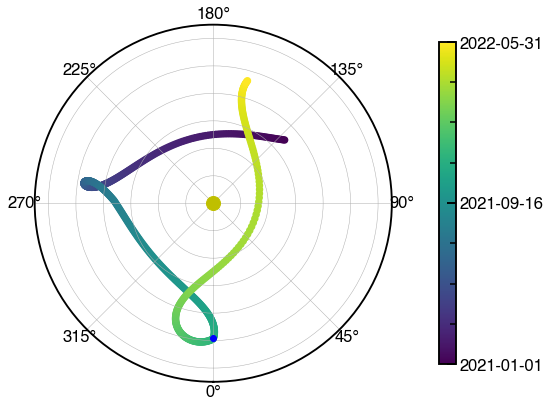

In [152]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='polar')
im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=35, marker='o')
ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])


ax.set_rlim(0, 1.3)
#ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
ax.grid(lw=0.5)
plt.tight_layout()
plt.savefig("STIX_orbit.png")

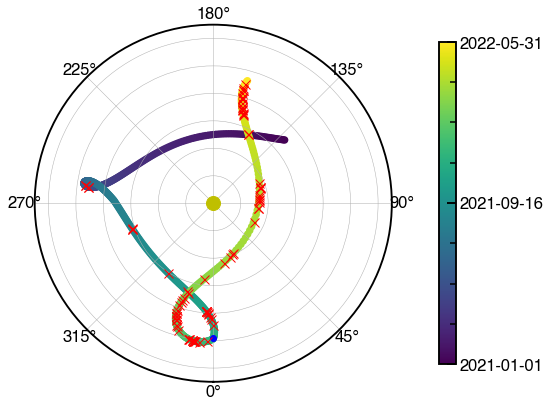

In [151]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='polar')
im = ax.scatter(solo_coords_hgs.lon.to(u.rad), 
           solo_coords_hgs.radius.to(u.au), c=ticks, s=35, marker='o')
ax.plot(earth_coords_hgs[0].lon.to(u.rad), 
           earth_coords_hgs[0].radius.to(u.au), ms=12, marker='.', color="blue")

ax.plot(sun_coords_hgs[0].lon.to(u.rad), 
        sun_coords_hgs[0].radius.to(u.AU), marker='o', color='y', label="Sun",  ms=14)

ax.set_theta_zero_location("S")
_ = ax.set_yticklabels([])

ax.plot(flares_c["lon"]*u.deg.to(u.rad), 
        flares_c["rad"]*u.km.to(u.au), marker='x', ls='', color='r')

ax.set_rlim(0, 1.3)
#ax.set_title("Positions in Heliographic StonyHurst")

cbar = fig.colorbar(im, ticks=[ticks[0],ticks[int(len(ticks)/2)], ticks[-1]], pad=0.1, shrink=0.6)
cbar.ax.set_yticklabels([dates.num2date(ticks[0]).strftime("%Y-%m-%d"), 
                         dates.num2date(ticks[int(len(ticks)/2)]).strftime("%Y-%m-%d"),
                         dates.num2date(ticks[-1]).strftime("%Y-%m-%d")])  # vertically oriented colorbar
ax.grid(lw=0.5)
plt.tight_layout()
plt.savefig("STIX_orbit_w_flares.png")

## Flaring rate plot

In [64]:
swpc_flares = pd.read_csv("swpc_flarelist_20100101-20220717_concat.csv")

In [65]:
swpc_flares["tstart_dt"] = pd.to_datetime(swpc_flares["ts"], format="%Y%m%d%H%M%S")
swpc_flares["unique_month"] = swpc_flares.tstart_dt.dt.strftime("%Y-%m")
swpc_flares = swpc_flares[(swpc_flares["tstart_dt"]>="2021-01-01")&(swpc_flares["tstart_dt"]<="2022-06-01")]

In [66]:
swpc_flares

,date,event_no,start_time,max_time,end_time,goes_sat,goes_channel,goes_class_ind,goes_class,integrated_flux,noaa_ar,ts,tstart_dt,unique_month
8713,20210119,5670,1746,1754,1759,G16,1-8A,C,C1.0,3.6E-04,12798,202101191746,2021-01-19 17:04:06,2021-01
8714,20210120,5770,1235,1253,1259,G16,1-8A,C,C1.4,1.2E-03,12798,202101201235,2021-01-20 12:03:05,2021-01
8715,20210227,6800,1751,1800,1805,G16,1-8A,C,C2.7,8.3E-04,12804,202102271751,2021-02-27 17:05:01,2021-02
8716,20210228,6850,640,0646,651,G16,1-8A,C,C3.9,1.2E-03,12804,202102280640,2021-02-28 06:04:00,2021-02
8717,20210302,7060,2353,0003,7,G16,1-8A,C,C1.2,2.8E-04,12807,202103022353,2021-03-02 23:05:03,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,20220527,8430,1530,1543,1552,G16,1-8A,C,C1.3,1.8E-03,13023,202205271530,2022-05-27 15:03:00,2022-05
9994,20220527,8470,1926,1933,1938,G16,1-8A,C,C1.4,9.8E-04,13024,202205271926,2022-05-27 19:02:06,2022-05
9995,20220528,8520,637,0646,653,G16,1-8A,C,C1.3,9.5E-04,0,202205280637,2022-05-28 06:03:07,2022-05
9996,20220528,8610,1853,1904,1912,G16,1-8A,C,C1.8,1.4E-03,13021,202205281853,2022-05-28 18:05:03,2022-05


In [67]:
stix_flares = pd.read_csv("stix_flares_20210101_20220601.csv")
stix_flares.sort_values(by="start_UTC", inplace=True)
stix_flares.reset_index(drop=True, inplace=True)

In [68]:
stix_flares["start_UTC"]

0       2021-01-01T04:38:38.116
1       2021-01-01T14:58:34.174
2       2021-01-06T14:09:38.745
3       2021-01-06T18:46:50.771
4       2021-01-09T05:32:30.802
                 ...           
6649    2022-05-31T22:33:20.056
6650    2022-05-31T22:44:20.057
6651    2022-05-31T22:59:28.059
6652    2022-05-31T23:24:12.061
6653    2022-05-31T23:33:48.062
Name: start_UTC, Length: 6654, dtype: object

In [69]:
stix_flares["goes_class_ind"] = [x[0] for x in stix_flares["GOES_class"].astype(str)]
stix_flares["unique_month"] = pd.to_datetime(stix_flares["start_UTC"]).dt.strftime("%Y-%m")
stix_flares_c = stix_flares[stix_flares["goes_class_ind"].isin(["X", "M", "C"])]


In [70]:
stix_flares["goes_class_ind"].unique()

array(['B', 'A', 'C', 'n', 'M', 'X'], dtype=object)

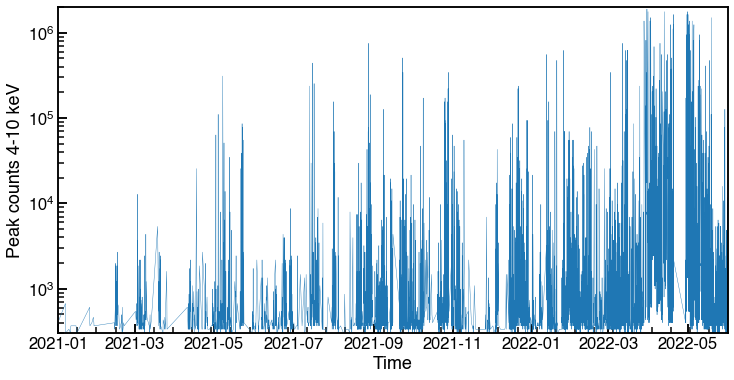

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(pd.to_datetime(stix_flares["start_UTC"]), stix_flares["LC0_peak_counts_4sec"], 
         lw=0.4)
plt.yscale("log")
ax.set_xlim(pd.to_datetime("2021-01-01"), pd.to_datetime("2022-06-01"))
plt.ylim(3e2, 2e6)
ax.set_ylabel("Peak counts 4-10 keV")
ax.set_xlabel("Time")
plt.savefig("stix_flares_410keV.png")

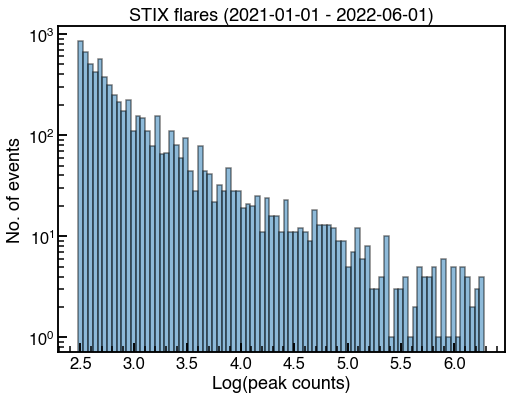

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.log10(stix_flares["LC0_peak_counts_4sec"]), bins=85, edgecolor='k', alpha=0.5)
# ax2 = ax.twinx()
# ax2.hist(np.log10(new_fermi_flares["peak counts"]), bins=100, edgecolor='k', alpha=0.5, color='r')
ax.set_yscale("log")

ax2.set_yscale("log")
ax.set_xlabel("Log(peak counts)")
ax.set_ylabel("No. of events")
ax.set_title("STIX flares (2021-01-01 - 2022-06-01)")
plt.savefig("stix_flare_dist.png")

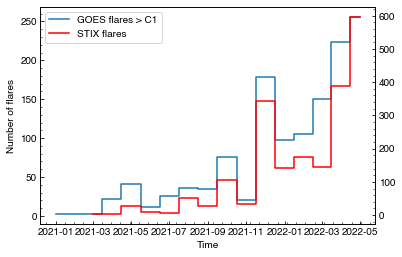

In [54]:
fig, ax = plt.subplots()
plt.plot(pd.to_datetime(swpc_flares.groupby("unique_month").count().index), 
         swpc_flares.groupby("unique_month").count()["goes_class_ind"],
         drawstyle="steps-mid", label="GOES flares > C1")
plt.plot(np.nan, color='r', label="STIX flares")
ax2 = ax.twinx()


ax2.plot(pd.to_datetime(stix_flares_c.groupby("unique_month").count().index), 
         stix_flares_c.groupby("unique_month").count()["flare_id"],
         drawstyle="steps-mid", color='r')
ax.set_ylabel("Number of flares")
ax.set_xlabel("Time")
ax.legend(loc="upper left")